In [1]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords ## Natural Language ToolKit
from nltk.stem.porter import PorterStemmer
#from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score

[nltk_data] Downloading package stopwords to C:\Users\Durga P T
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
!pip3 install plotly
import plotly.graph_objs as go

In [3]:
from plotly.offline import iplot

In [4]:
!pip3 install textblob

In [5]:
#!pip3 install wordcloud

In [6]:
!pip3 install cufflinks

In [7]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [8]:
import textblob            #to import
from textblob import TextBlob

In [9]:
df=pd.read_excel('C:\\Users\\Durga P T M\\BA_A_Python_Sem2\\Datasets\\P2PLending_review.xlsx')

In [10]:
df.head()

,name,review_text,review_rating
0,faircent,No 1 Fraud company. I invested more than 2 Lac...,1
1,faircent,NaN,1
2,faircent,NaN,1
3,faircent,NaN,1
4,faircent,BIG BIG BIG BIG FRAUD COMPANY ON THE WORLD. ...,1


In [11]:
df['review_text'][0]

'No 1 Fraud company. I invested more than 2 Lacs Rs but not able to get my money back. Customer care told me that contact after 1 month , after 16 days lab lab lab. Borrowers are not paying money and Faircent is not filling legal case against defaulter since last 3 years'

## Text Cleaning

1. Remove missing data rows 
2. Change review_rating in to 0 and 1
3. Remove special characters
4. Converting to lower case
5. Remove stop words
6. Stemming

In [12]:
df=df.dropna()
df

,name,review_text,review_rating
0,faircent,No 1 Fraud company. I invested more than 2 Lac...,1
4,faircent,BIG BIG BIG BIG FRAUD COMPANY ON THE WORLD. ...,1
5,faircent,Started with faircent few years ago and post C...,1
6,faircent,Transparent process and trustworthy customer s...,5
7,faircent,Sourav just rocks appreciate his professionali...,5
...,...,...,...
755,Cashkumar,Great service! The goto platform for getting l...,5
756,Cashkumar,Awesome service! The best platform I've come a...,5
757,Cashkumar,"Made my loan settlements very easy, and also r...",5
758,Cashkumar,Found the eligibility calculator useful. Thank...,4


In [13]:
df.shape

(563, 3)

In [14]:
#Check for number of missing values in each columns
df.isnull().sum()

name             0
review_text      0
review_rating    0
dtype: int64

In [15]:
df.head()

,name,review_text,review_rating
0,faircent,No 1 Fraud company. I invested more than 2 Lac...,1
4,faircent,BIG BIG BIG BIG FRAUD COMPANY ON THE WORLD. ...,1
5,faircent,Started with faircent few years ago and post C...,1
6,faircent,Transparent process and trustworthy customer s...,5
7,faircent,Sourav just rocks appreciate his professionali...,5


In [16]:
df['review_rating']=df['review_rating'].apply(lambda y_value: 1 if y_value>=3.5 else 0)
df

,name,review_text,review_rating
0,faircent,No 1 Fraud company. I invested more than 2 Lac...,0
4,faircent,BIG BIG BIG BIG FRAUD COMPANY ON THE WORLD. ...,0
5,faircent,Started with faircent few years ago and post C...,0
6,faircent,Transparent process and trustworthy customer s...,1
7,faircent,Sourav just rocks appreciate his professionali...,1
...,...,...,...
755,Cashkumar,Great service! The goto platform for getting l...,1
756,Cashkumar,Awesome service! The best platform I've come a...,1
757,Cashkumar,"Made my loan settlements very easy, and also r...",1
758,Cashkumar,Found the eligibility calculator useful. Thank...,1


In [17]:
def convert_lower(text):
    return text.lower()

In [18]:
df['review_text']=df['review_text'].apply(convert_lower)

In [19]:
def remove_special(text):
    x=''
    
    for i in text:
        i=re.sub("[0-9]"," ",i)
        if i.isalnum():
            x = x + i
        else:
            x = x + ' '
    
    return x

In [20]:
remove_special('No 1 Fraud company. I invested more than 2 Lac...')

'No   Fraud company  I invested more than   Lac   '

In [21]:
df['review_text']=df['review_text'].apply(remove_special)

In [22]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
def remove_stopwords(text):
    x=[]
    for i in text.split():
        
        if i not in stopwords.words('english'):
            x.append(i)
    y=x[:]
    x.clear()
    return y

In [24]:
df['review_text']=df['review_text'].apply(remove_stopwords)

In [25]:
df

,name,review_text,review_rating
0,faircent,"[fraud, company, invested, lacs, rs, able, get...",0
4,faircent,"[big, big, big, big, fraud, company, world, be...",0
5,faircent,"[started, faircent, years, ago, post, covid, e...",0
6,faircent,"[transparent, process, trustworthy, customer, ...",1
7,faircent,"[sourav, rocks, appreciate, professionalism, e...",1
...,...,...,...
755,Cashkumar,"[great, service, goto, platform, getting, loan...",1
756,Cashkumar,"[awesome, service, best, platform, come, acros...",1
757,Cashkumar,"[made, loan, settlements, easy, also, referral...",1
758,Cashkumar,"[found, eligibility, calculator, useful, thank...",1


In [26]:
ps=PorterStemmer()

In [27]:
y=[]

def stem_words(text):
    for i in text:
        y.append(ps.stem(i))
        
    z=y[:]
    y.clear()
    return z

In [28]:
df['review_text']=df['review_text'].apply(stem_words)

In [29]:
def join_back(list_input):
    return " ".join(list_input)

In [30]:
df['review_text']=df['review_text'].apply(join_back)

In [31]:
df['review_text'].apply(lambda x: str(TextBlob(x).correct()))
df['review_text'].head()

0    fraud compani invest lac rs abl get money back...
4    big big big big fraud compani world best guine...
5    start faircent year ago post covid experi bad ...
6    transpar process trustworthi custom servic mak...
7    sourav rock appreci profession etiquett fairce...
Name: review_text, dtype: object

In [32]:
df['polarity'] = df['review_text'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['review_text'].astype(str).apply(len)
df['word_count'] = df['review_text'].apply(lambda x: len(str(x).split()))

In [33]:
df

,name,review_text,review_rating,polarity,review_len,word_count
0,faircent,fraud compani invest lac rs abl get money back...,0,0.066667,158,29
4,faircent,big big big big fraud compani world best guine...,0,0.200000,103,17
5,faircent,start faircent year ago post covid experi bad ...,0,-0.287245,321,55
6,faircent,transpar process trustworthi custom servic mak...,1,0.344444,129,19
7,faircent,sourav rock appreci profession etiquett fairce...,1,0.266667,201,31
...,...,...,...,...,...,...
755,Cashkumar,great servic goto platform get loan conveni,1,0.800000,43,7
756,Cashkumar,awesom servic best platform come across loan d...,1,1.000000,52,8
757,Cashkumar,made loan settlement easi also referr option good,1,0.700000,49,8
758,Cashkumar,found elig calcul use thank quick call back le...,1,0.166667,72,14


In [44]:
print('5 random reviews with the highest negative sentiment polarity: \n')
cl = df.loc[df.polarity <0, ['review_text']].sample(5).values
for c in cl:
    print("-",c[0])

5 random reviews with the highest negative sentiment polarity: 

- charg loan process fetch cibil score crifghigh shown wrong report confirm actual cibil bureau reject applic basi wrong report took money take necessari action
- day complet applic till respons custom servic number correct check realli creat bad impress compani
- insensit fund profil would use iq level ladi name alka even knew stand knew address written electr bill everi review made googl fake treat prioriti essenti call ask tell rate googl first staff never come solut problem
- bad experi cheat peopl
- invest money see lot overdu default run loss edit guy take action updat otherwis hand sens respons use properli high percentag npa mean algo process ultim poor let lend collect problem side


In [41]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = df.loc[df.polarity > 0.3, ['review_text']].sample(5).values
for c in cl:
    print("-",c[0])

5 random reviews with the highest positive sentiment polarity: 

- appli pl right amount disburs servic cashkumar good staff also help thank sharmila speed applic feel interest rate bit high also use emerg purpos
- appli pl right amount disburs servic cashkumar good staff also help good
- good experi take easili loan short period time
- easi process loan good serivc support
- ifund good platform borrow investor ifund give best opportun peopl want get loan within short period time best part entir process quick onlin need run anywher opinion good concept must say hassl free


In [42]:
df

,name,review_text,review_rating,polarity,review_len,word_count
0,faircent,fraud compani invest lac rs abl get money back...,0,0.066667,158,29
4,faircent,big big big big fraud compani world best guine...,0,0.200000,103,17
5,faircent,start faircent year ago post covid experi bad ...,0,-0.287245,321,55
6,faircent,transpar process trustworthi custom servic mak...,1,0.344444,129,19
7,faircent,sourav rock appreci profession etiquett fairce...,1,0.266667,201,31
...,...,...,...,...,...,...
755,Cashkumar,great servic goto platform get loan conveni,1,0.800000,43,7
756,Cashkumar,awesom servic best platform come across loan d...,1,1.000000,52,8
757,Cashkumar,made loan settlement easi also referr option good,1,0.700000,49,8
758,Cashkumar,found elig calcul use thank quick call back le...,1,0.166667,72,14


In [67]:
def get_top_n_words(corpus, n=None):
    cv = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['review_text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['review_text' , 'count'])
df2.groupby('review_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')


loan 258
good 190
servic 168
thank 132
team 130
process 120
experi 107
cashkumar 107
support 95
time 92
custom 89
help 88
great 85
best 82
invest 81
platform 78
cash 77
kumar 69
money 57
work 57


<AxesSubplot:>

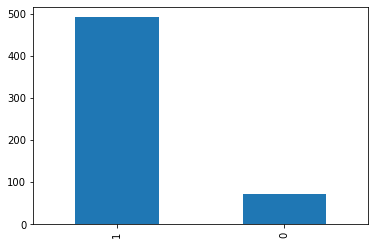

In [68]:
df['review_rating'].value_counts().plot(kind='bar')

<AxesSubplot:>

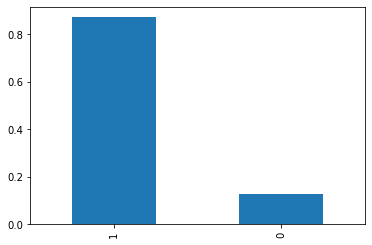

In [69]:
df['review_rating'].value_counts(1).plot(kind='bar')

In [70]:
df['review_rating'].value_counts(0)

1    491
0     72
Name: review_rating, dtype: int64

In [71]:
y0 = df.loc[df['name'] == 'faircent']['polarity']
y1 = df.loc[df['name'] == 'i2ifunding']['polarity']
y2 = df.loc[df['name'] == 'cashkumar']['polarity']

trace0 = go.Bar(
    y=y0,
    name = 'faircent',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Bar(
    y=y1,
    name = 'i2ifunding',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Bar(
    y=y1,
    name = 'cashkumar',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "Sentiment Polarity Boxplot of Company Name"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Sentiment Polarity Boxplot of Company Name")

In [72]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    else:
        return 'Positive'
    
df['Analysis']=df['polarity'].apply(getAnalysis)

df

,name,review_text,review_rating,polarity,review_len,word_count,Analysis
0,faircent,fraud compani invest lac rs abl get money back...,0,0.066667,158,29,Positive
4,faircent,big big big big fraud compani world best guine...,0,0.200000,103,17,Positive
5,faircent,start faircent year ago post covid experi bad ...,0,-0.287245,321,55,Negative
6,faircent,transpar process trustworthi custom servic mak...,1,0.344444,129,19,Positive
7,faircent,sourav rock appreci profession etiquett fairce...,1,0.266667,201,31,Positive
...,...,...,...,...,...,...,...
755,Cashkumar,great servic goto platform get loan conveni,1,0.800000,43,7,Positive
756,Cashkumar,awesom servic best platform come across loan d...,1,1.000000,52,8,Positive
757,Cashkumar,made loan settlement easi also referr option good,1,0.700000,49,8,Positive
758,Cashkumar,found elig calcul use thank quick call back le...,1,0.166667,72,14,Positive


In [73]:
prev=df[df.Analysis=='Positive']
prev=prev['review_text']

round((prev.shape[0]/df.shape[0])*100,1)

93.1

In [74]:
prev=df[df.Analysis=='Negative']
prev=prev['review_text']

round((prev.shape[0]/df.shape[0])*100,1)

6.9

In [75]:
len(df[df.Analysis=='Negative'])

39

<AxesSubplot:ylabel='Analysis'>

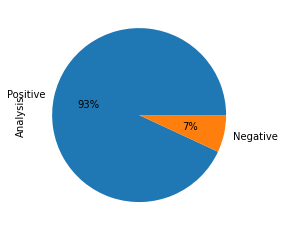

In [76]:
df.Analysis.value_counts().plot(kind='pie',autopct='%1.0f%%')

In [77]:
#def rev_plot(com_name):
#    for i in com_name:
 #       if com_name=='faircent':
  #          df.Analysis.value_counts().plot(kind='pie',autopct='%1.0f%%')

In [78]:
df

,name,review_text,review_rating,polarity,review_len,word_count,Analysis
0,faircent,fraud compani invest lac rs abl get money back...,0,0.066667,158,29,Positive
4,faircent,big big big big fraud compani world best guine...,0,0.200000,103,17,Positive
5,faircent,start faircent year ago post covid experi bad ...,0,-0.287245,321,55,Negative
6,faircent,transpar process trustworthi custom servic mak...,1,0.344444,129,19,Positive
7,faircent,sourav rock appreci profession etiquett fairce...,1,0.266667,201,31,Positive
...,...,...,...,...,...,...,...
755,Cashkumar,great servic goto platform get loan conveni,1,0.800000,43,7,Positive
756,Cashkumar,awesom servic best platform come across loan d...,1,1.000000,52,8,Positive
757,Cashkumar,made loan settlement easi also referr option good,1,0.700000,49,8,Positive
758,Cashkumar,found elig calcul use thank quick call back le...,1,0.166667,72,14,Positive


<AxesSubplot:xlabel='name'>

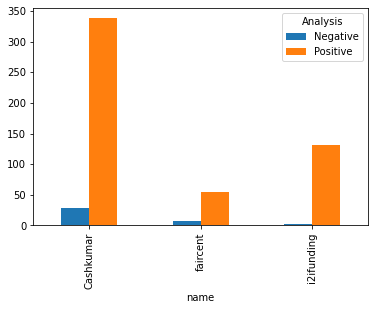

In [79]:
rev_sentiment=df.groupby(['name','Analysis']).Analysis.count().unstack()
rev_sentiment.plot(kind='bar')

In [80]:
cv=CountVectorizer(max_features=65)

In [81]:
df

,name,review_text,review_rating,polarity,review_len,word_count,Analysis
0,faircent,fraud compani invest lac rs abl get money back...,0,0.066667,158,29,Positive
4,faircent,big big big big fraud compani world best guine...,0,0.200000,103,17,Positive
5,faircent,start faircent year ago post covid experi bad ...,0,-0.287245,321,55,Negative
6,faircent,transpar process trustworthi custom servic mak...,1,0.344444,129,19,Positive
7,faircent,sourav rock appreci profession etiquett fairce...,1,0.266667,201,31,Positive
...,...,...,...,...,...,...,...
755,Cashkumar,great servic goto platform get loan conveni,1,0.800000,43,7,Positive
756,Cashkumar,awesom servic best platform come across loan d...,1,1.000000,52,8,Positive
757,Cashkumar,made loan settlement easi also referr option good,1,0.700000,49,8,Positive
758,Cashkumar,found elig calcul use thank quick call back le...,1,0.166667,72,14,Positive


In [82]:
X=cv.fit_transform(df['review_text']).toarray()

In [83]:
X.shape

(563, 65)

In [84]:
y=df.iloc[:,-1].values
y

array(['Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positi

In [85]:
y.shape

(563,)

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [87]:
clf1=GaussianNB()
clf2=MultinomialNB()
clf3=BernoulliNB()

In [88]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)

BernoulliNB()

In [89]:
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)
y_pred3=clf3.predict(X_test)

In [90]:
print('Gaussian :',accuracy_score(y_test,y_pred1)*100)
print('Multinomial :',accuracy_score(y_test,y_pred2)*100)
print('Bernaulli :',accuracy_score(y_test,y_pred3)*100)

Gaussian : 70.79646017699115
Multinomial : 93.80530973451327
Bernaulli : 92.03539823008849


In [96]:
acc=round(accuracy_score(y_test,y_pred2)*100,2)

In [97]:
print('The accuracy score of the model is :',acc,'%')

The accuracy score of the model is : 93.81 %


In [45]:
print('The accuracy score of the model is : 85.84%')

The accuracy score of the model is : 85.84%


In [93]:
df.rename(columns={'polarity':'Sentiments_score'},inplace=True)

In [94]:
df

,name,review_text,review_rating,Sentiments_score,review_len,word_count,Analysis
0,faircent,fraud compani invest lac rs abl get money back...,0,0.066667,158,29,Positive
4,faircent,big big big big fraud compani world best guine...,0,0.200000,103,17,Positive
5,faircent,start faircent year ago post covid experi bad ...,0,-0.287245,321,55,Negative
6,faircent,transpar process trustworthi custom servic mak...,1,0.344444,129,19,Positive
7,faircent,sourav rock appreci profession etiquett fairce...,1,0.266667,201,31,Positive
...,...,...,...,...,...,...,...
755,Cashkumar,great servic goto platform get loan conveni,1,0.800000,43,7,Positive
756,Cashkumar,awesom servic best platform come across loan d...,1,1.000000,52,8,Positive
757,Cashkumar,made loan settlement easi also referr option good,1,0.700000,49,8,Positive
758,Cashkumar,found elig calcul use thank quick call back le...,1,0.166667,72,14,Positive
